# Project 1 - Explore Weather Trends

This notebook/PDF is the first submission by Mustapha Muhammad Garba for the Udacity Data Analyst Nanodegree. It's an exploration and comparison of global weather data as it compares to the city I'm currently in while doing this comparison: Abuja, Nigeria. Aside from the SQL query to extract the data to CSV, which I did on the Udacity interface, everything in this work was done with Python libraries:

- pandas for extracting the data from csv into dataframe, and calculating the moving averages
- matplotlib to plot the line charts
- nbconvert to export the notebook to PDF

The notebook itself I will also upload to GitHub at https://github.com/mustaphagarba/weather-trends



In [2]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## SQL Code

In the Udacity interface I used the following SQL queries to obtain the data used in this notebook:

- SELECT * FROM global_data;
- SELECT * FROM city_data WHERE city = "Abuja";

I downloaded as CSV after each query evaluation

In [3]:
globalvar = pd.read_csv('global_data.csv')
abujavar = pd.read_csv('abuja_data.csv')

print(globalvar.head())

print("\n")

print(abujavar.head())

   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47


   year   city  country  avg_temp
0  1856  Abuja  Nigeria     26.93
1  1857  Abuja  Nigeria     24.67
2  1858  Abuja  Nigeria     25.87
3  1859  Abuja  Nigeria     25.31
4  1860  Abuja  Nigeria     25.52


Let's quickly plot year against temperature for both the world at large and Abuja in particular, and see how that shakes out.

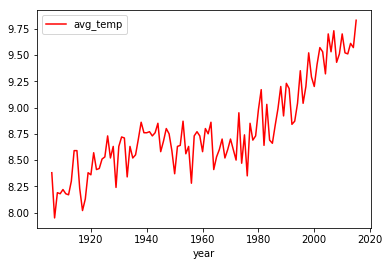

In [4]:
globalvar.iloc[156:].plot(kind='line',x='year',y='avg_temp',color='red')
plt.show()

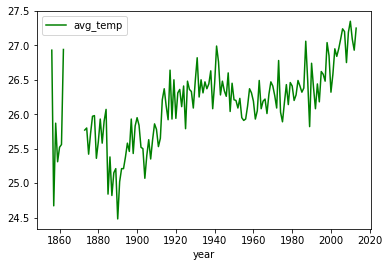

In [5]:
abujavar.plot(kind='line',x='year',y='avg_temp',color='green')
plt.show()

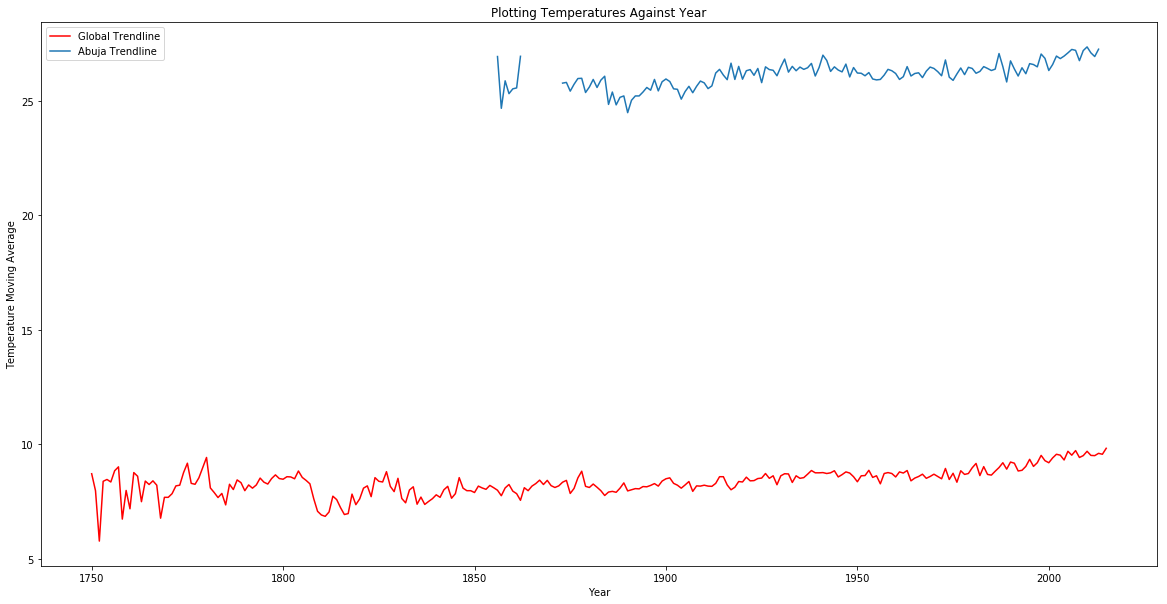

In [15]:
globalvar['temperature_moving_average'] = globalvar.iloc[:,1].rolling(window=7).mean()
abujavar['temperature_moving_average'] = abujavar.iloc[:,3].rolling(window=7).mean()

plt.figure(figsize=(20,10))
plt.plot(globalvar['year'],globalvar['avg_temp'],label='Global Trendline', color = 'red')
plt.plot(abujavar['year'],abujavar['avg_temp'],label='Abuja Trendline')
plt.xlabel('Year')
plt.ylabel('Temperature Moving Average')
plt.legend()
plt.title('Plotting Temperatures Against Year')
plt.show()


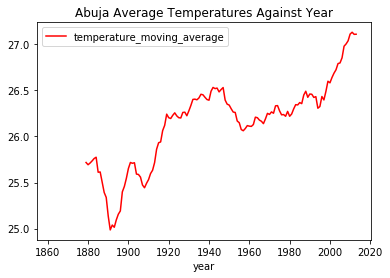

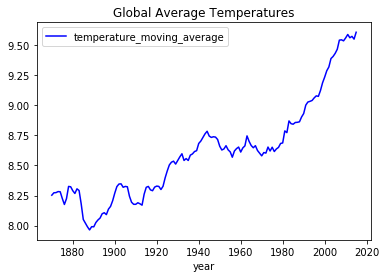

In [18]:
abujavar.plot(kind='line',x='year',y='temperature_moving_average',color='red', title='Abuja Average Temperatures Against Year')
globalvar.iloc[120:].plot(kind='line',x='year',y='temperature_moving_average',color='blue', title='Global Average Temperatures')

The following trends are immediately obvious on looking at this plot:

- Global temperatures have generally trended upwards over the past 150 or so years, with notable inflection points around the periods of 1880-1889, and World War 2.
- Local temperatures in Abuja have generally trended about 16-18 degrees celsius above the global average
- From a big picture point of view, global temperatures have been trending upwards for the past two centuries
- Plotting both trendlines on the same plot makes it difficult to see any changes at all on that scale, as temperatures have generally increased at about 1 degree Celsius per century.